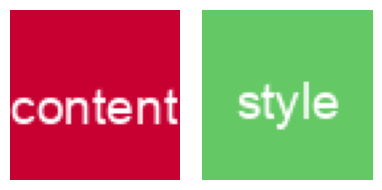

In [1]:
%load_ext autoreload
%autoreload 2

from text3d2video.utilities.ipython_utils import display_ims
from visual_tests.testing_utils import test_img
import torchvision.transforms.functional as TF

res = 64

content_im = test_img("content", color=(200, 0, 50), return_type='pt', resolution=res) 
style_im = test_img("style", color=(100, 200, 100), return_type='pt', resolution=res) 

display_ims([TF.to_pil_image(im) for im in [content_im, style_im]])

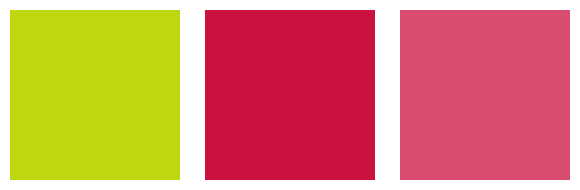

In [ ]:
from text3d2video.adain import calc_channel_mean_std_2D

mean, std = calc_channel_mean_std_2D(content_im.unsqueeze(0))

lo, hi = mean - std, mean + std

mean_color = TF.to_pil_image(mean[0])
lo_color = TF.to_pil_image(lo[0])
hi_color = TF.to_pil_image(hi[0])
display_ims([lo_color, mean_color, hi_color])

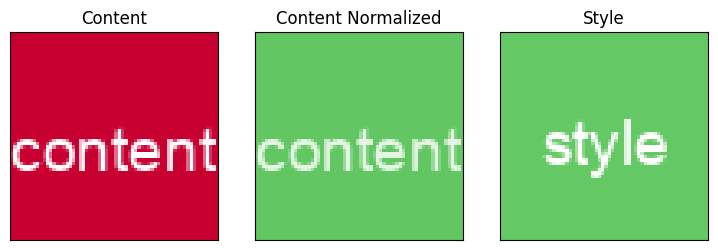

In [3]:
from text3d2video.adain import adain_2D
from text3d2video.utilities.ipython_utils import display_ims_grid

content_normalized = adain_2D(content_im.unsqueeze(0), style_im.unsqueeze(0))[0]

display_ims_grid(
    [[TF.to_pil_image(im) for im in [content_im, content_normalized, style_im]]],
    col_titles=["Content", "Content Normalized", "Style"],
)

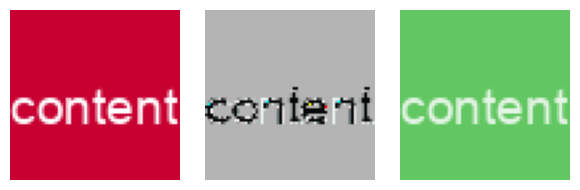

In [4]:
content_features = content_im.unsqueeze(0)
style_features = style_im.unsqueeze(0)

size = content_features.size()

style_mean, style_std = calc_channel_mean_std_2D(style_features)
content_mean, content_std = calc_channel_mean_std_2D(content_features)

normalized_content = (content_im - content_mean.expand(size)) / content_std.expand(size)

shifted_content = normalized_content * style_std.expand(size) + style_mean.expand(size)
# display_ims_grid([TF.to_pil_image(normalized_content[0])])

normalized_im = TF.to_pil_image(normalized_content[0])
shifted_im = TF.to_pil_image(shifted_content[0])
original_im = TF.to_pil_image(content_features[0])

display_ims([original_im, normalized_im, shifted_im])

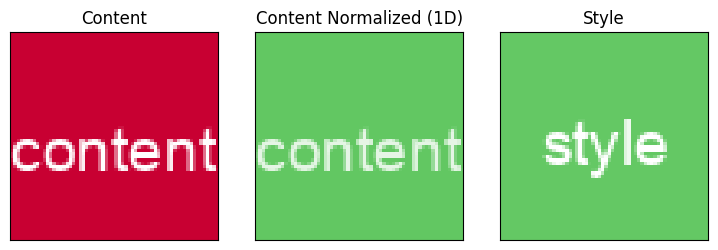

In [5]:
from einops import rearrange

from text3d2video.adain import adain_1D


content_1D = rearrange(content_im, "c h w -> (h w) c")
style_1D = rearrange(style_im, "c h w -> (h w) c")

content_normalized_1D = adain_1D(content_1D.unsqueeze(0), style_1D.unsqueeze(0))[0]

normalized_reshaped = rearrange(content_normalized_1D, "(h w) c -> c h w", h=res, w=res)

display_ims_grid(
    [[TF.to_pil_image(im) for im in [content_im, normalized_reshaped, style_im]]],
    col_titles=["Content", "Content Normalized (1D)", "Style"],
)